In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import os
import re
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def parse_function(filename):
    image_string = tf.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize_images(image, [224, 224])
    return image

In [3]:
def get_filenames(home_path, subfolder):
    sub=subfolder
    d=os.path.join(home_path,sub)
    filenames = [os.path.join(d,i) for i in os.listdir(d)]
    filenames = sorted(filter(lambda x: (((x).split('.')[1] == "jpg")),filenames))
    return filenames

In [4]:

def get_feature_vectores(filenames):

    x = len(filenames)

    dataset = tf.data.Dataset.from_tensor_slices(filenames)
    dataset = dataset.map(parse_function, num_parallel_calls=4)
    iterator = dataset.make_one_shot_iterator()
    next_element = iterator.get_next()

    module = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2")
    height, width = hub.get_expected_image_size(module)

    init = ([tf.global_variables_initializer(), tf.local_variables_initializer()])
    l=[]
    with tf.Session() as sess:
        sess.run(init)

        for i in range(x):
            value = sess.run(next_element)
            #print value
            value = tf.reshape(value,[-1,224,224,3])
            feature_vectors = module(value)
            value2 = sess.run(feature_vectors)
            l.append(value2)
            print value2
    l = np.asarray(l)
    return l


In [18]:
def write_csv(filenames, file_path, l):
    x = len(filenames)

    f = open(file_path, mode='a')        
    fwriter = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(x):
        tmp=list(np.squeeze(l[i]))
        row=[[filenames[i]]+tmp]
        fwriter.writerow(row)
    f.close()

In [6]:
HOME_PATH = "/home/whiterab22bit/crop_filter/"
filePath_p1 = "/home/whiterab22bit/feature_vectors_p1.csv"
filePath_p2 = "/home/whiterab22bit/feature_vectors_p2.csv"
filePath_p3 = "/home/whiterab22bit/feature_vectors_p3.csv"

In [8]:
#person1

filenames1 = get_filenames(HOME_PATH, 'p1')

l1 = get_feature_vectores(filenames1)


INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.09514919 1.8529602  0.32097957 ... 0.24997228 0.         0.96648735]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.06877731 1.537077   0.02456312 ... 0.2873636  0.         0.8750261 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.10829826 1.6564211  0.         ... 0.         0.         0.7380834 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.         1.7384914  0.07437179 ... 0.01469555 0.         0.965214  ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.6360311 2.0839598 0.        ... 0.        0.        1.2135596]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.49041596 1.8609155  0.18963711 ... 0.01

In [19]:
write_csv(filenames1, filePath_p1, l1)

In [13]:
filenames2 = get_filenames(HOME_PATH, 'p2')
l2 = get_feature_vectores(filenames2)
write_csv(filenames2, filePath_p2, l2)


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.2237083  0.25768453 0.01786157 ... 0.         0.         1.7960036 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.07062984 1.2454036  0.07813327 ... 0.03431292 0.         1.7377579 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.02085521 2.5486994  0.03376503 ... 0.03128859 0.         2.338003  ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.20485464 2.2375073  0.08356599 ... 0.         0.         0.4202685 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[1.06566146e-01 1.85887504e+00 1.30232245e-01 ... 1.94271049e-03
  0.00000000e+00 2.40588522e+00]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.50051457 0.13883674 0.00379818 ... 0.         0.11954534 0.5186218

In [14]:
filenames3 = get_filenames(HOME_PATH, 'p3')
l3 = get_feature_vectores(filenames3)
write_csv(filenames3, filePath_p3, l3)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.         0.5345488  0.06196169 ... 0.24818933 0.         0.67460173]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.0565029  1.2438847  0.         ... 0.16018504 0.         0.03805529]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.00982726 0.72936815 0.         ... 0.28247747 0.16178168 0.2431399 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.         0.8646836  0.00656845 ... 0.2956912  0.03991164 0.26214328]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.         1.3389097  0.         ... 0.1287359  0.03660013 0.1326819 ]]
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
[[0.02592772 1.5463068  0.         ... 0.04395444 0.2490677  0.1266307 ]]
INFO:tensorflow:Saver 

In [20]:
def distance(l, i1, i2):
    k = l.shape[2]
    if not (i1<l.shape[0] and i2<l.shape[0]):
        print "i1/i2 out of index"
        return
    summ = 0
    for i in range(k):
        f1=l[i1][0][i]
        f2 = l[i2][0][i]
        summ+=(f1-f2)*(f1-f2)
    print summ
    return summ

In [21]:
size = l1.shape[0]
distances1 = []

for i in range(size):
    for j in range(i):
        curr1 = distance(l1, i, j)
        distances1.append(curr1)
    


125.9558580212405
96.1704821897959
117.44519544001159
100.05974253131492
138.74868648843216
136.36460001416677
147.69973786401724
105.23536071508472
104.12863909199106
110.22387624211729
121.91980082561403
146.0013900831051
105.4774931283723
117.97685073442616
95.90381747604692
167.5534861829784
196.06092423175764
108.85511437524003
162.96492940685908
149.836090398299
109.50454856860222
139.86653667875817
173.01691210770232
128.60831400254546
118.15624626947803
158.08487570701197
131.87139266732908
78.35771605801838
97.43189886189663
155.88070729902597
107.78969307173338
104.42109312548088
150.08924663040239
120.25120587577983
83.69939016727723
61.56088389685837
167.40294858393867
150.89075372186272
134.31404008464295
186.8451774598207
188.29339141907465
186.5024009964868
132.6222154755676
151.01990681854195
114.54084507548595
235.5453448050402
224.40556270213253
199.74935423730585
260.6818106948216
262.8681023736894
272.42922197348594
197.54490929177345
199.6404031714765
181.435507292

In [22]:
distances1 = np.asarray(distances1)
distances1.shape

(105,)

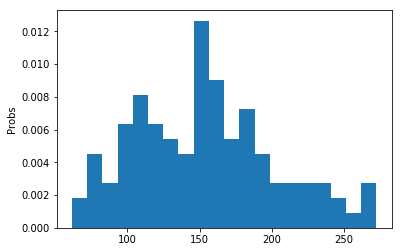

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = distances1
plt.hist(x, normed=True, bins=20)
plt.ylabel('Probs');

In [26]:
size = l2.shape[0]
distances2 = []

for i in range(size):
    for j in range(i):
        curr1 = distance(l2, i, j)
        distances2.append(curr1)
distances2 = np.asarray(distances2)
distances2.shape    

309.36031777183234
363.5607559175156
117.57015282090578
355.06565762149097
140.87082751254013
160.49190673107003
288.1555503717992
139.40481513389966
229.1482864323751
171.81829709220858
114.55621921570473
344.6816659613622
386.89985001910054
333.640618751249
305.62803050434314
292.1873662906943
113.3299139444714
171.04408799178398
121.75683481349876
106.35426711387557
308.1345404655537
362.47820114637847
159.78903746627404
141.88530908086193
134.96609918690854
209.5842239467864
363.56058310979284
130.90245904194788
344.1379438202156
113.64520968138692
117.19785194621188
129.94690224264738
138.85547072706134
364.8956981986574
118.85170618180639
109.62095472192365
181.5768622535214
252.52779778543137
339.2147545451249
357.6053105652823
252.13098293534196
214.69612611100072
249.0316219804513
383.3594565324477
287.85823985820997
405.11749269453344
134.91081912452614
152.01637337925766
138.1847342074363
229.8229453466087
426.6753101198337
110.83473956597743
102.87481944564067
106.216738645

(91,)

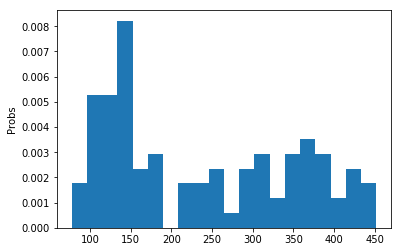

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = distances2
plt.hist(x, normed=True, bins=20)
plt.ylabel('Probs');

In [28]:
size = l3.shape[0]
distances3 = []

for i in range(size):
    for j in range(i):
        curr1 = distance(l3, i, j)
        distances3.append(curr1)
distances3 = np.asarray(distances2)
distances3.shape    

154.26416923715212
184.80707935140595
106.28577861358981
113.8154857029407
89.88604719582527
67.58030788573421
139.11603056090462
156.01568190170227
121.5252405840921
68.19118912291563
153.91188157940704
171.04113122623667
139.19572184448458
103.58993533568518
61.13067707021449
227.72288327189682
206.39319295643247
165.6560637356859
146.00041459683487
138.20899623962367
99.29916032768728
217.07409007918264
130.73148056543306
112.99904847690634
139.3248499404511
188.66082103949876
182.04856967148714
205.18127881148467
225.22582494626155
240.4147513601707
206.67039742365762
193.8180284782771
218.91437249156968
153.7969761149578
149.78991457613174
265.42870104627127
164.80935752545963
133.19375467494177
102.92837057807762
109.17994792589175
135.85988814033328
102.92848933325135
157.704730610262
86.32346187236145
188.179506045318
188.0030838424209
208.6858024295798
179.24305586459556
153.27611899452222
137.6786079141282
116.41646718143639
130.49612175260623
212.52602307863614
155.380543539

(91,)

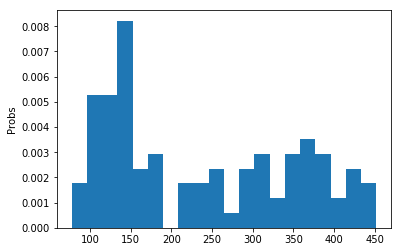

In [29]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = distances3
plt.hist(x, normed=True, bins=20)
plt.ylabel('Probs');